code adapted from https://github.com/MIND-Lab/OCTIS

In [ ]:
!pip install octis

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from octis.dataset.dataset import Dataset
from octis.models.LDA import LDA
dataset = Dataset()
dataset.load_custom_dataset_from_folder("/content/gdrive/My Drive/AllComments/SanFrancisco")
nt = 10

In [ ]:
from octis.evaluation_metrics.diversity_metrics import TopicDiversity
from octis.evaluation_metrics.coherence_metrics import Coherence
# eval a model
def eval_model(model_output, num_topics):
    metric = TopicDiversity(topk=10) # Initialize metric
    topic_diversity_score = metric.score(model_output) # Compute score of the metric
    #print("Topic diversity ", i , ":", str(topic_diversity_score))

    npmi = Coherence(texts=dataset.get_corpus(), topk=10, measure='c_npmi')
    npmi_score = npmi.score(model_output)
    #print("Coherence " , i , ":", str(npmi_score))


    #umass = Coherence(texts=dataset.get_corpus(), topk=10, measure='c_v')
    #umass = umass.score(model_output)
    #print("Coherence " , i , ":", str(umass))


    return topic_diversity_score, npmi_score

In [ ]:
#train a model
diversity = []
coherence = []
for i in range(2, 51):
  model = LDA(num_topics=i)  # Create model
  model_output = model.train_model(dataset) # Train the model
  topic_diversity_score, npmi_score = eval_model(model_output, i)
  diversity.append(topic_diversity_score)
  coherence.append(npmi_score)

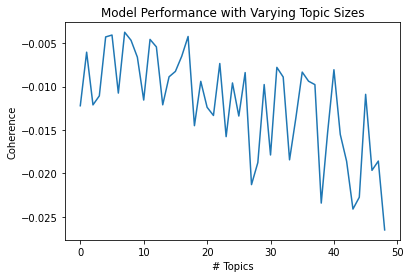

In [ ]:
from matplotlib import pyplot as plt
plt.plot(coherence)
plt.xlabel('# Topics') 
plt.ylabel('Coherence') 
  
# displaying the title
plt.title("Model Performance with Varying Topic Sizes")
plt.show()

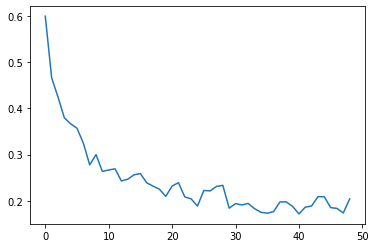

In [ ]:
plt.plot(diversity)

In [ ]:
model = LDA(num_topics=nt)  # Create model
model_output = model.train_model(dataset) # Train the model
# topic_diversity_score, npmi_score = eval_model(model_output, i)
# diversity.append(topic_diversity_score)
# coherence.append(npmi_score)

In [ ]:
# eval a model
from octis.evaluation_metrics.diversity_metrics import TopicDiversity
from octis.evaluation_metrics.coherence_metrics import Coherence

metric = TopicDiversity(topk=10) # Initialize metric
topic_diversity_score = metric.score(model_output) # Compute score of the metric
print("Topic diversity: "+str(topic_diversity_score))

npmi = Coherence(texts=dataset.get_corpus(), topk=10, measure='c_npmi')
npmi_score = npmi.score(model_output)
print("Coherence: "+str(npmi_score))

Topic diversity: 0.3
Coherence: -0.00682920905816467


In [ ]:
for topic in model_output['topics']:
  print(topic)

['feel', 'live', 'city', 'time', 'people', 'place', 'friend', 'thing', 'find', 'walk']
['city', 'people', 'live', 'feel', 'love', 'time', 'problem', 'move', 'thing', 'year']
['feel', 'people', 'place', 'move', 'year', 'love', 'city', 'live', 'way', 'time']
['people', 'live', 'city', 'time', 'year', 'move', 'look', 'thing', 'leave', 'homeless']
['people', 'city', 'move', 'look', 'problem', 'walk', 'live', 'really', 'find', 'street']
['city', 'people', 'move', 'year', 'live', 'love', 'bad', 'walk', 'black', 'thing']
['move', 'people', 'feel', 'year', 'live', 'city', 'back', 'job', 'work', 'still']
['people', 'live', 'black', 'place', 'feel', 'much', 'experience', 'city', 'find', 'really']
['live', 'people', 'move', 'city', 'place', 'never', 'love', 'time', 'family', 'year']
['people', 'black', 'city', 'love', 'live', 'much', 'move', 'friend', 'find', 'place']


In [ ]:
#from octis.optimization.optimizer import Optimizer
#from skopt.space.space import Real

# Define the search space. To see which hyperparameters to optimize, see the topic model's initialization signature
#search_space = {"alpha": Real(low=0.001, high=5.0), "eta": Real(low=0.001, high=5.0)}

# Initialize an optimizer object and start the optimization.
#optimizer=Optimizer()
#optResult=optimizer.optimize(model, dataset, TopicDiversity(), search_space, save_path="../results", # path to store the results
#                             number_of_call=30, # number of optimization iterations
#                             model_runs=5) # number of runs of the topic model





In [ ]:
from google.colab import files
#optResult.save_to_csv("results.csv")
#files.download("results.csv")